# Конвергентная валидность: международные гендерные индексы за последний доступный год

Гендерные индексы международных организаций: ООН, ВЭФ, ОЭСР, Равные меры — 2030 за 2020-2023 годы. 

In [1]:
from randan.descriptive_statistics import ScaleStatistics # интервальная статистика
import pandas as pd # для обработки и анализа структурированных данных
import numpy as np# для корректной работы рандана 
from randan.bivariate_association import Correlation 
import seaborn as sns
import matplotlib.pyplot as plt

Массив данных находится в папке: https://disk.yandex.ru/d/PWOTilngObaAJg 

In [2]:
# загружаем таблицу
df = pd.read_excel('all_reversed.xlsx')

In [3]:
# дескриптивная статистика
# от 144 до 180 стран в рейтингах
# df.describe()

In [4]:
# удаляем пробелы, остается 102 страны
df = df.dropna()
df

,Страна,ООН 2023 Индекс эмпауэрмента,ООН 2023 Индекс равноправия,ВЭФ 2023 Индекс разрыва,ОЭСР 2023 Индекс Инстит. мер,Равные меры 2020 Индекс ЦУР,ООН 2022 Индекс развития,ООН 2022 Индекс неравенства,Регион,Доход,Индекс человеческого развития
1,Albania,0.610,0.860,0.791,0.911,0.741888,0.977,0.884,Европа и Северная Америка,Выше среднего,Высокий
7,Armenia,0.656,0.770,0.721,0.763,0.743409,1.026,0.802,Европа и Северная Америка,Выше среднего,Высокий
8,Australia,0.805,0.870,0.778,0.846,0.846922,0.978,0.937,Азия и Тихоокеанский,Высокий,Очень высокий
9,Austria,0.778,0.808,0.740,0.902,0.887281,0.972,0.952,Европа и Северная Америка,Высокий,Очень высокий
13,Bangladesh,0.443,0.527,0.722,0.507,0.576681,0.914,0.502,Азия и Тихоокеанский,Ниже среднего,Средний
...,...,...,...,...,...,...,...,...,...,...,...
189,United States,0.752,0.787,0.748,0.809,0.765776,1.005,0.820,Европа и Северная Америка,Высокий,Очень высокий
190,Uruguay,0.688,0.825,0.714,0.806,0.787029,1.020,0.760,Латинская и Центральная Америка,Высокий,Очень высокий
194,Viet Nam,0.612,0.758,0.711,0.755,0.693916,1.007,0.622,Азия и Тихоокеанский,Ниже среднего,Высокий
196,Zambia,0.441,0.637,0.699,0.689,0.504408,0.930,0.474,Африка к югу от Сахары,Ниже среднего,Средний


In [5]:
# нормализуем данные
# (df-df.mean ())/df.std()

Значения коэффициента корреляции Спирмена составляют от 0,88 для 2013 и 2020 года до 0,996 для 2021 и 2022 года при p-value менее 0,05. Рейтинг Евросоюза "Индекс гендерного равенства" обладает высокой надежностью-устойчивостью. 

In [6]:
# проверяем нормальность распределения по каждому рейтингу
# тест Колмогорова-Смирнова
# распределение не является нормальным
ss = ScaleStatistics(df, ['ООН 2022 Индекс неравенства'], show_results=False, normality_test=True, normality_test_type='ks') 
ss.summary() 


NORMALITY TESTS
------------------



,statistic,p-value
ООН 2022 Индекс неравенства,0.138,0.000


,N,mode,median,mean,25%,75%,interquart. range,interquart. range (norm.),min,max,range,std,var,entropy coef.,quality var.
ООН 2022 Индекс неравенства,102.0,0.391,0.633,0.685235,0.5145,0.88675,0.37225,0.55726,0.323,0.991,0.668,0.200988,0.040396,0.997623,0.999718


In [7]:
# корреляционный анализ значений рейтинга по годам, метод Спирмена
corr = Correlation(df, method = 'spearman', two_tailed = True, n_decimals=3)


CORRELATION SUMMARY (SPEARMAN METHOD, 2-TAILED)
------------------
The following variables were removed from the analysis since they do not belong to numerical dtypes: Страна, Регион, Доход, Индекс человеческого развития



Note: Each empty index duplicates the previous one.
Maximum correlation is 0.962 (p-value 0.0) for variables Равные меры 2020 Индекс ЦУР and ООН 2022 Индекс неравенства,
minimum correlation is 0.549 (p-value 0.0) for variables ВЭФ 2023 Индекс разрыва and ООН 2022 Индекс развития.


In [8]:
# приводим в табличный вид для приложения в диссертации 
# метод Спирмена, для сравнения с другими рейтингами
corr.correlation_matrix

ООН 2023 Индекс эмпауэрмента  \
ООН 2023 Индекс эмпауэрмента Coefficient                  1.000000e+00   
                             p-value                               NaN   
                             N                            1.020000e+02   
ООН 2023 Индекс равноправия  Coefficient                  8.083013e-01   
                             p-value                      9.672733e-25   
                             N                            1.020000e+02   
ВЭФ 2023 Индекс разрыва      Coefficient                  7.220155e-01   
                             p-value                      1.099924e-17   
                             N                            1.020000e+02   
ОЭСР 2023 Индекс Инстит. мер Coefficient                  7.981627e-01   
                             p-value                      9.724957e-24   
                             N                            1.020000e+02   
Равные меры 2020 Индекс ЦУР  Coefficient                  9.416887e-01   
                             p-value                      4.197724e-49   
                             N                            1.020000e+02   
ООН 2022 Индекс развития     Coefficient                  6.910825e-01   
                             p-value                      9.060485e-16   
                             N                            1.020000e+02   
ООН 2022 Индекс неравенства  Coefficient                  9.138471e-01   
                             p-value                      6.280711e-41   
                             N                            1.020000e+02   

                                          ООН 2023 Индекс равноправия  \
ООН 2023 Индекс эмпауэрмента Coefficient                 8.083013e-01   
                             p-value                     9.672733e-25   
                             N                           1.020000e+02   
ООН 2023 Индекс равноправия  Coefficient                 1.000000e+00   
                             p-value                              NaN   
                             N                           1.020000e+02   
ВЭФ 2023 Индекс разрыва      Coefficient                 8.411637e-01   
                             p-value                     1.889468e-28   
                             N                           1.020000e+02   
ОЭСР 2023 Индекс Инстит. мер Coefficient                 7.282474e-01   
                             p-value                     4.205931e-18   
                             N                           1.020000e+02   
Равные меры 2020 Индекс ЦУР  Coefficient                 6.729659e-01   
                             p-value                     9.372710e-15   
                             N                           1.020000e+02   
ООН 2022 Индекс развития     Coefficient                 5.962048e-01   
                             p-value                     3.806595e-11   
                             N                           1.020000e+02   
ООН 2022 Индекс неравенства  Coefficient                 6.588067e-01   
                             p-value                     5.206210e-14   
                             N                           1.020000e+02   

                                          ВЭФ 2023 Индекс разрыва  \
ООН 2023 Индекс эмпауэрмента Coefficient             7.220155e-01   
                             p-value                 1.099924e-17   
                             N                       1.020000e+02   
ООН 2023 Индекс равноправия  Coefficient             8.411637e-01   
                             p-value                 1.889468e-28   
                             N                       1.020000e+02   
ВЭФ 2023 Индекс разрыва      Coefficient             1.000000e+00   
                             p-value                          NaN   
                             N                       1.020000e+02   
ОЭСР 2023 Индекс Инстит. мер Coefficient             6.761286e-01   
                             p-value           

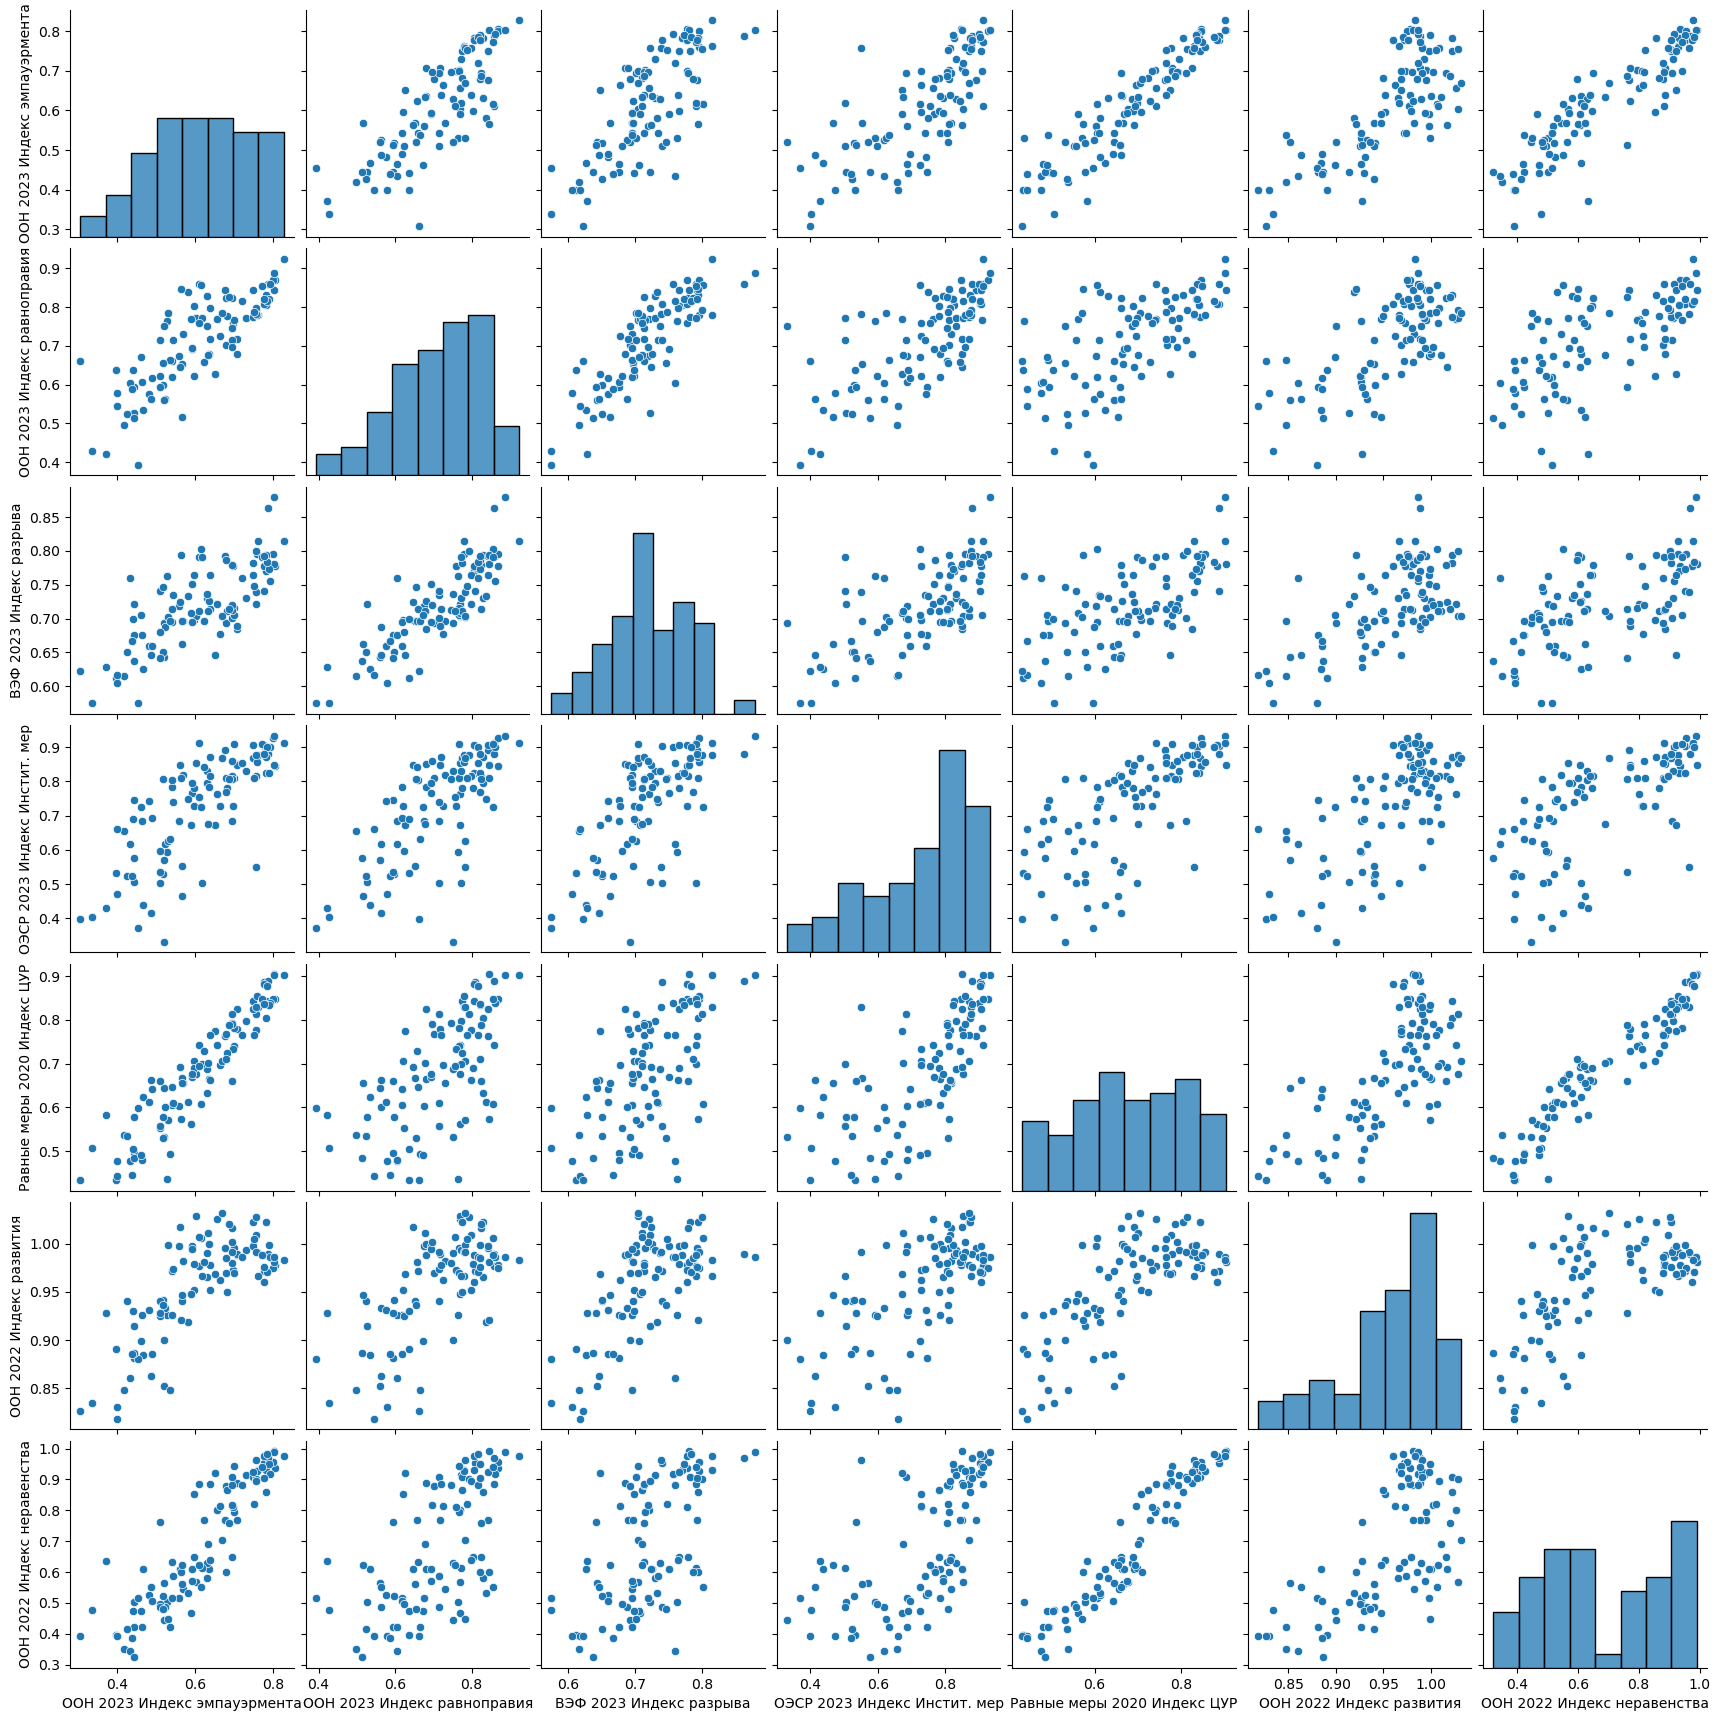

In [9]:
sns.pairplot(df);

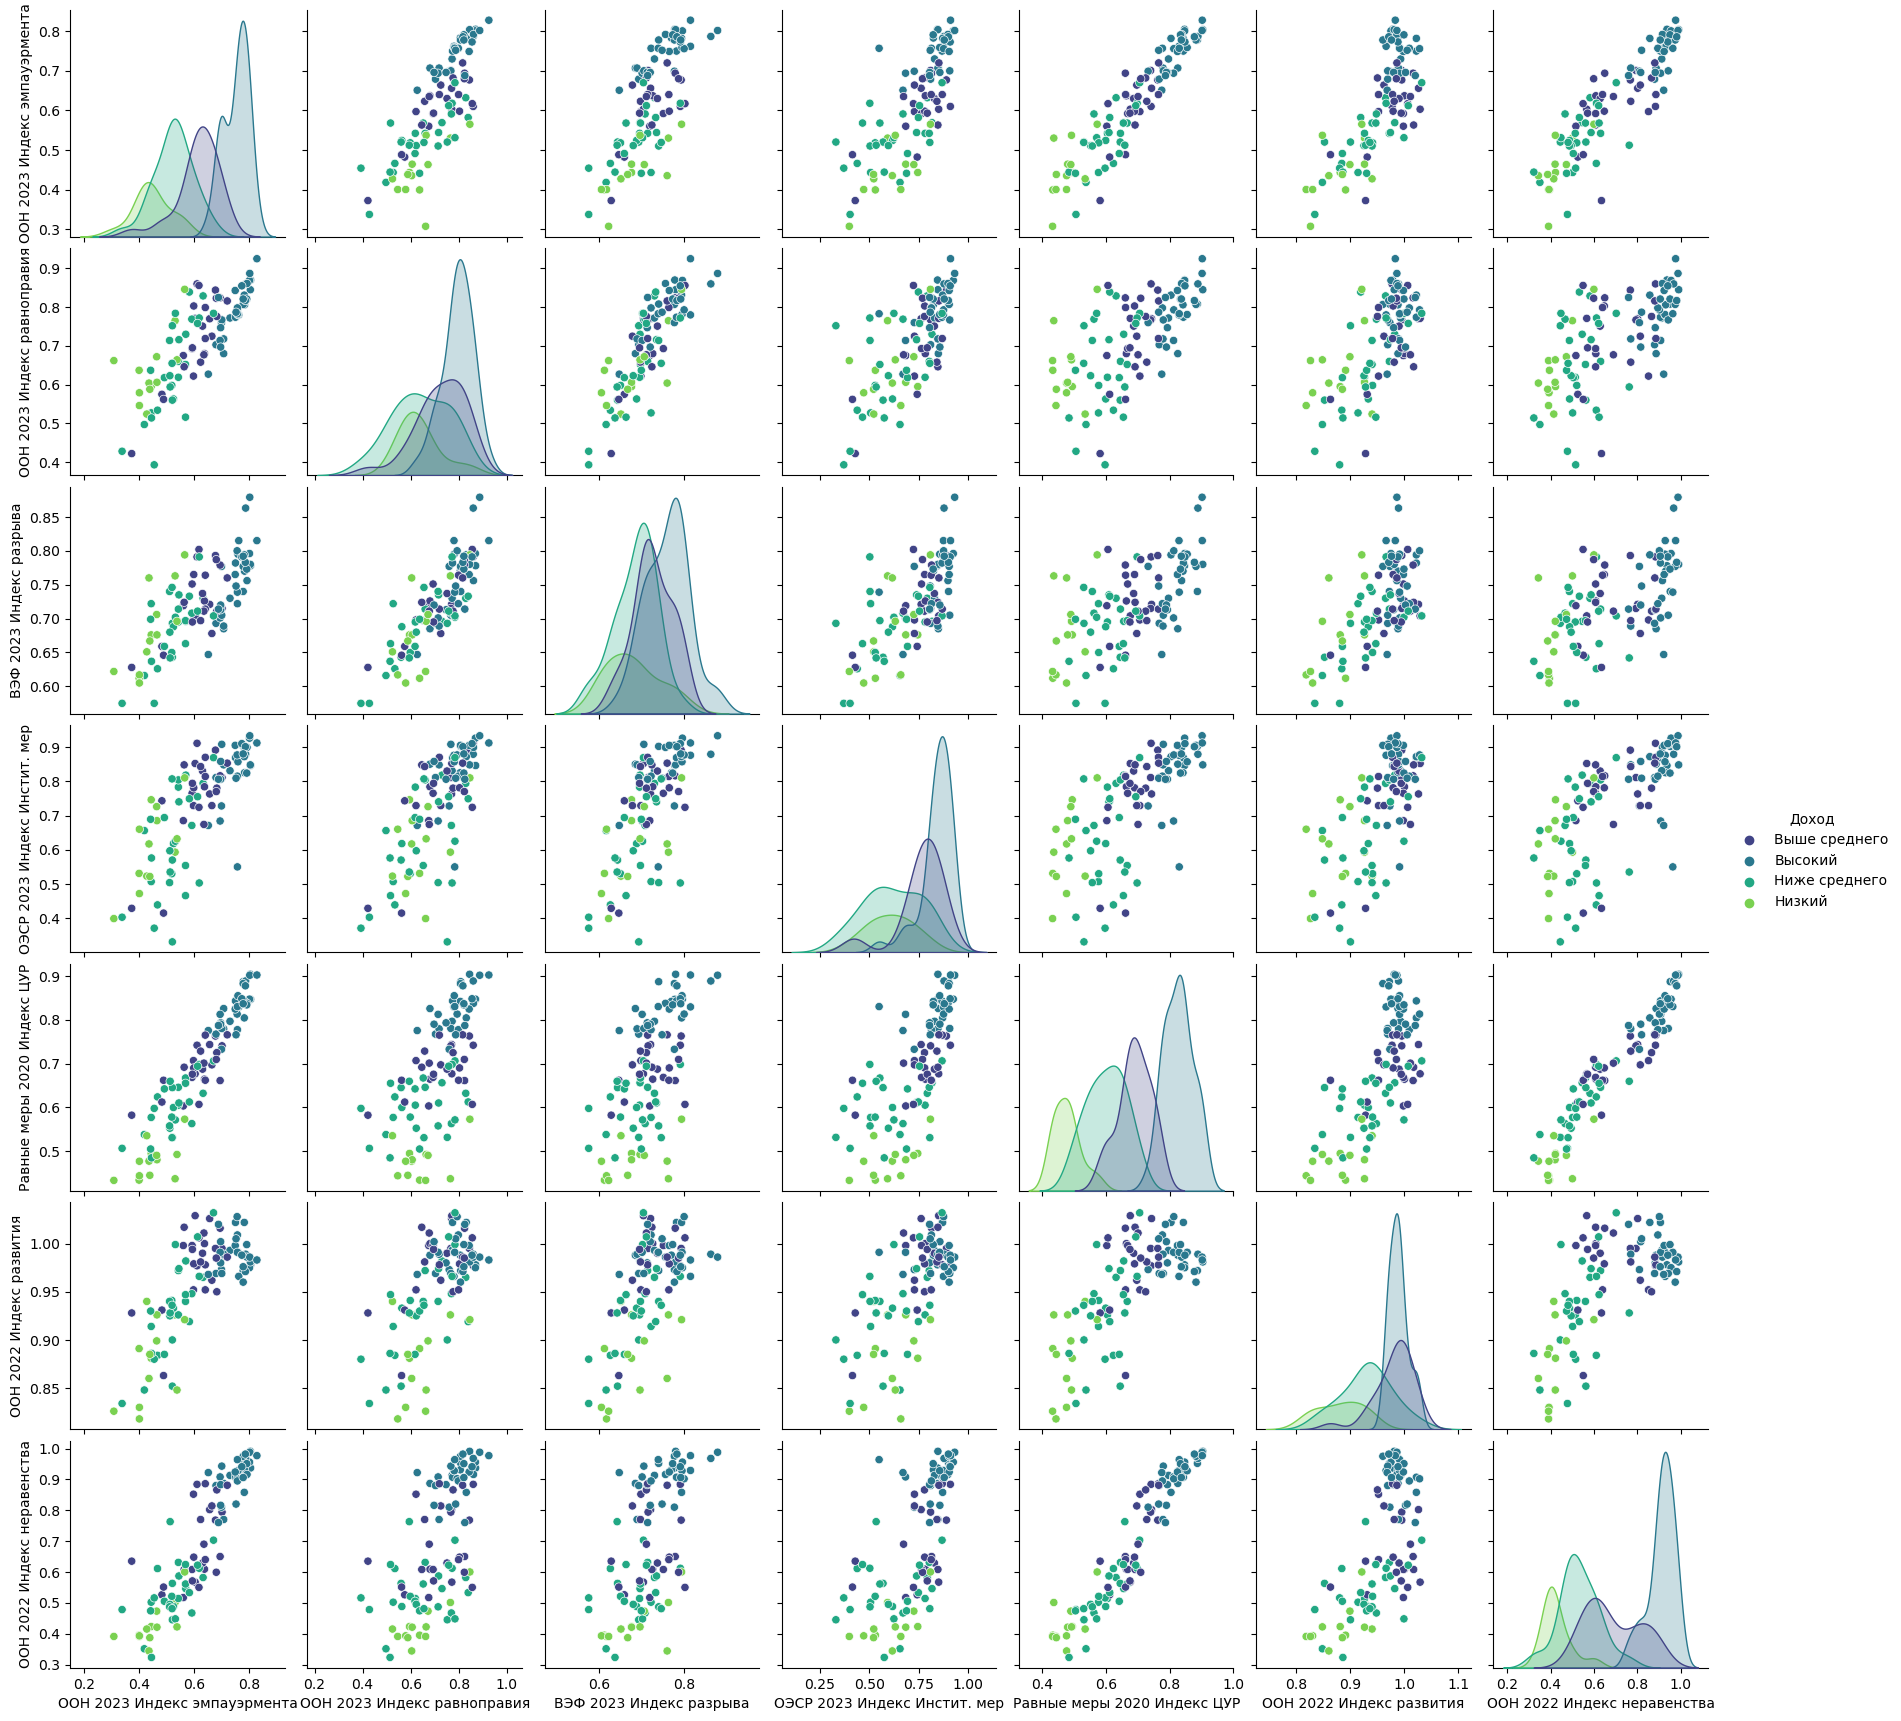

In [10]:
sns.pairplot(df, palette='viridis', hue = 'Доход');

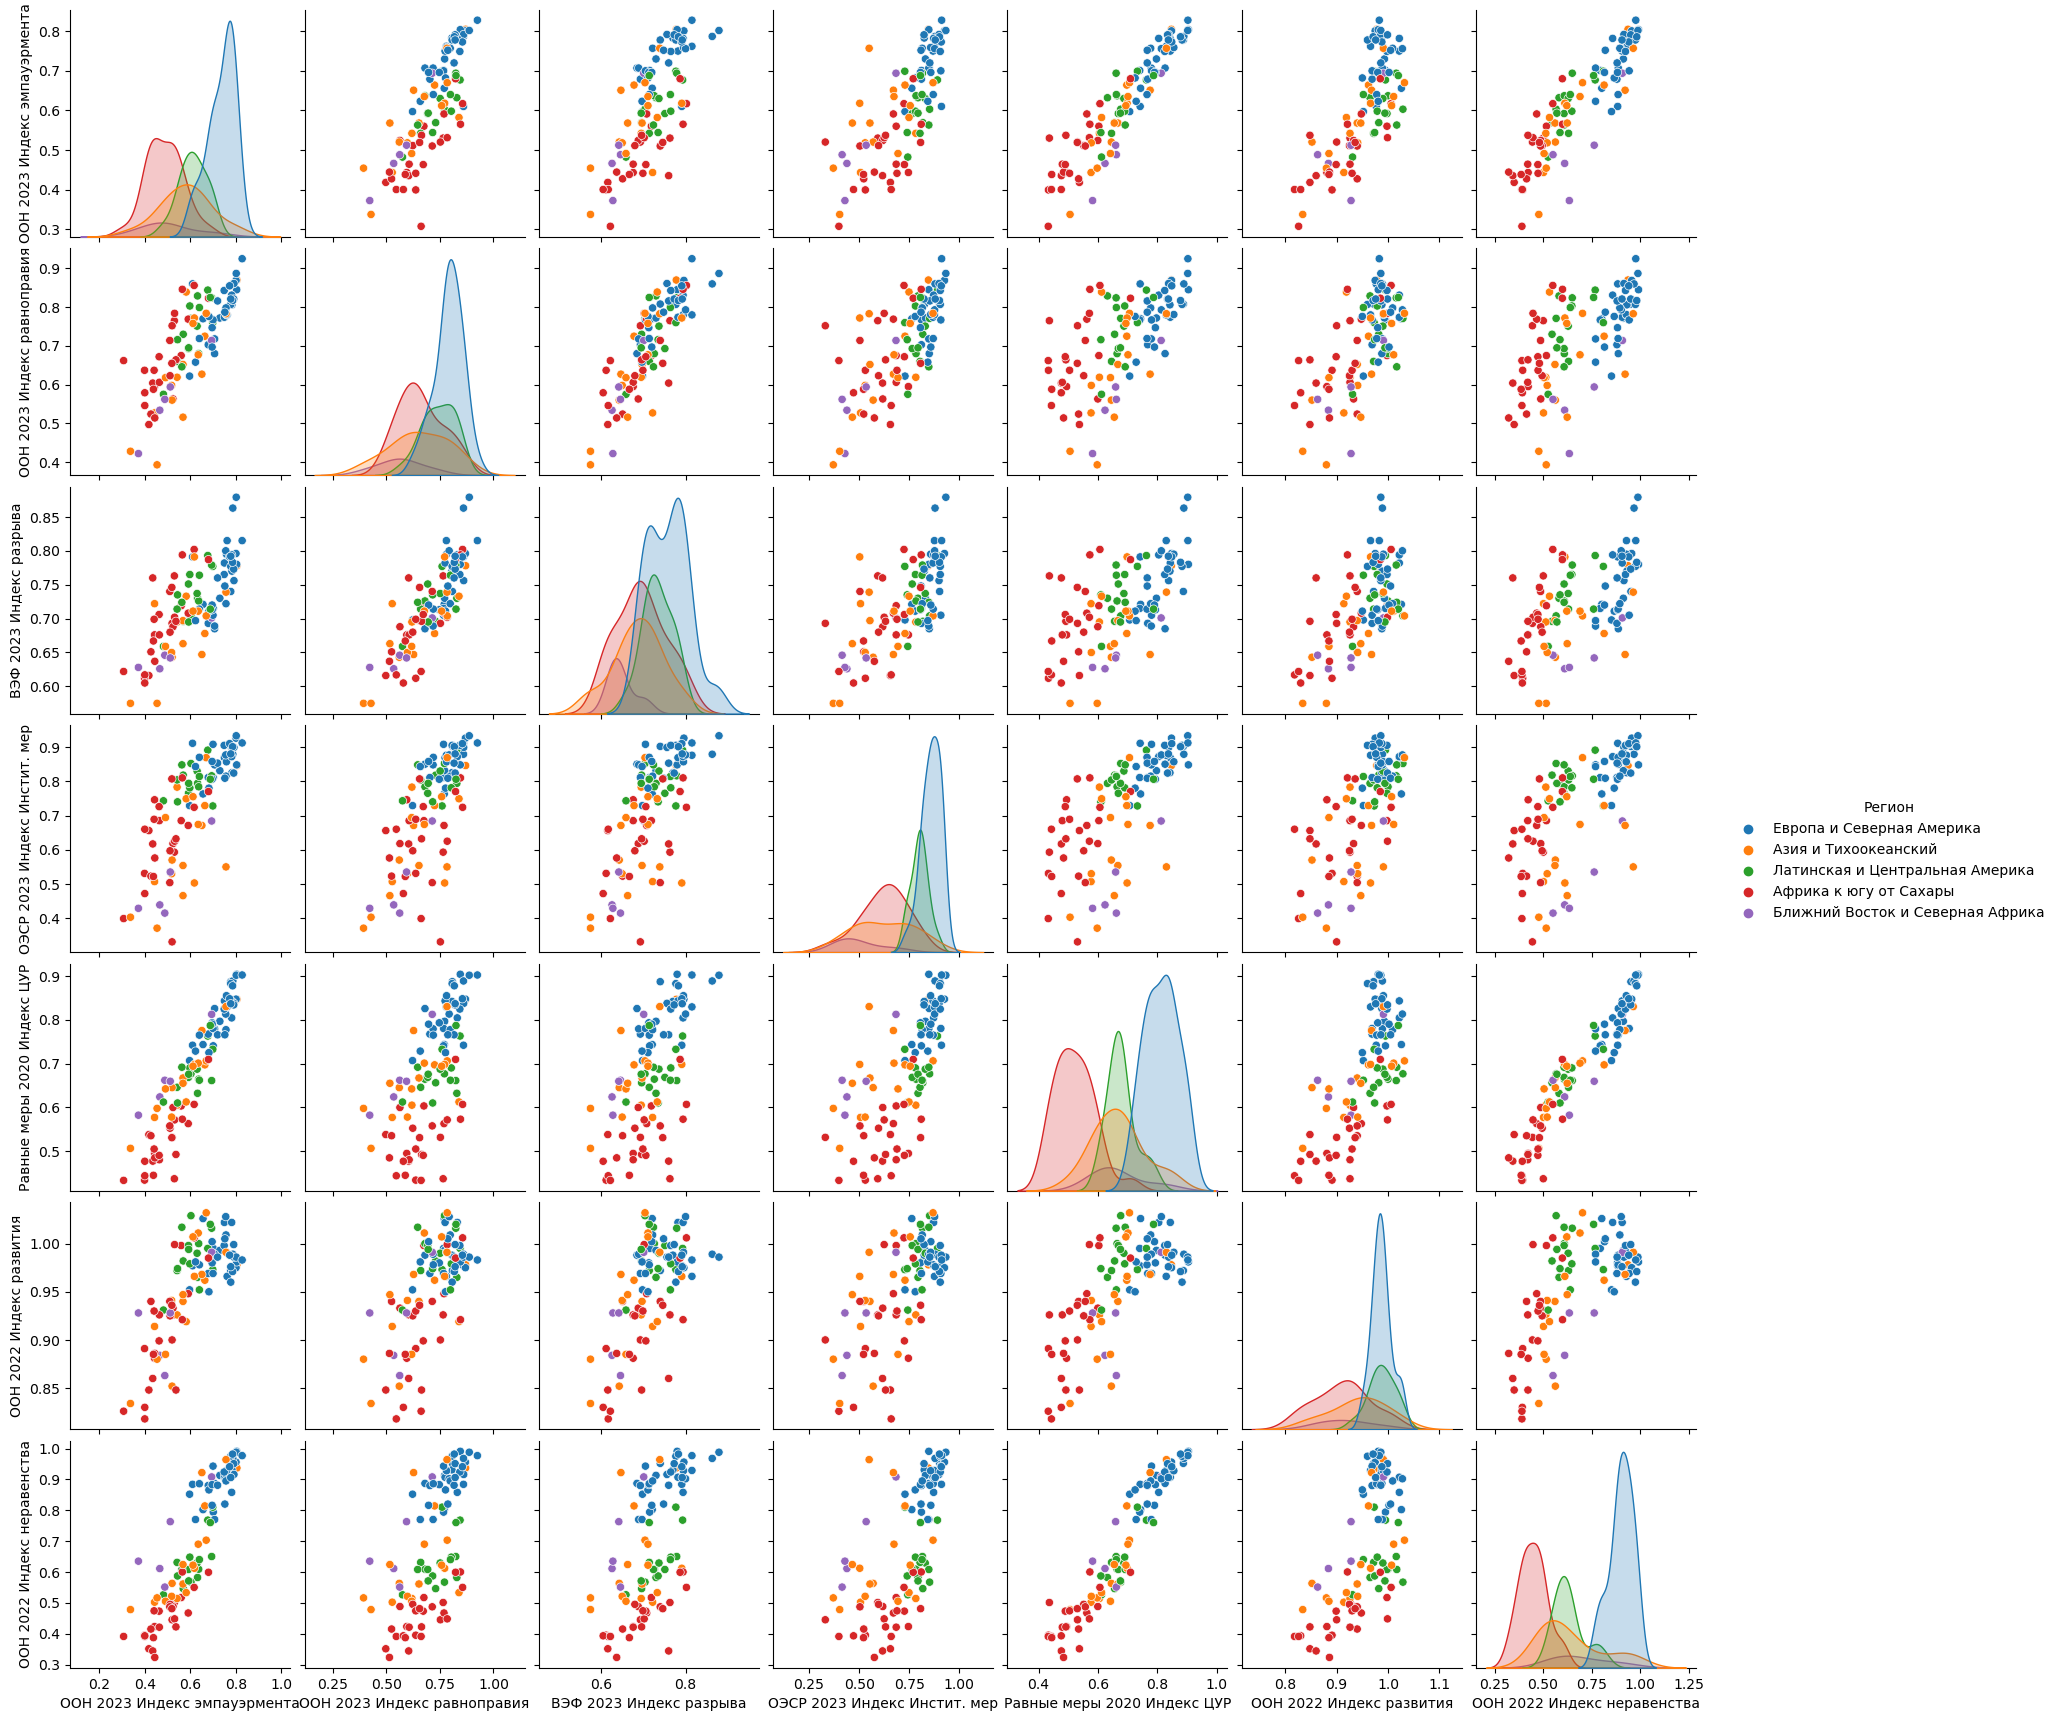

In [11]:
sns.pairplot(df, hue = 'Регион');

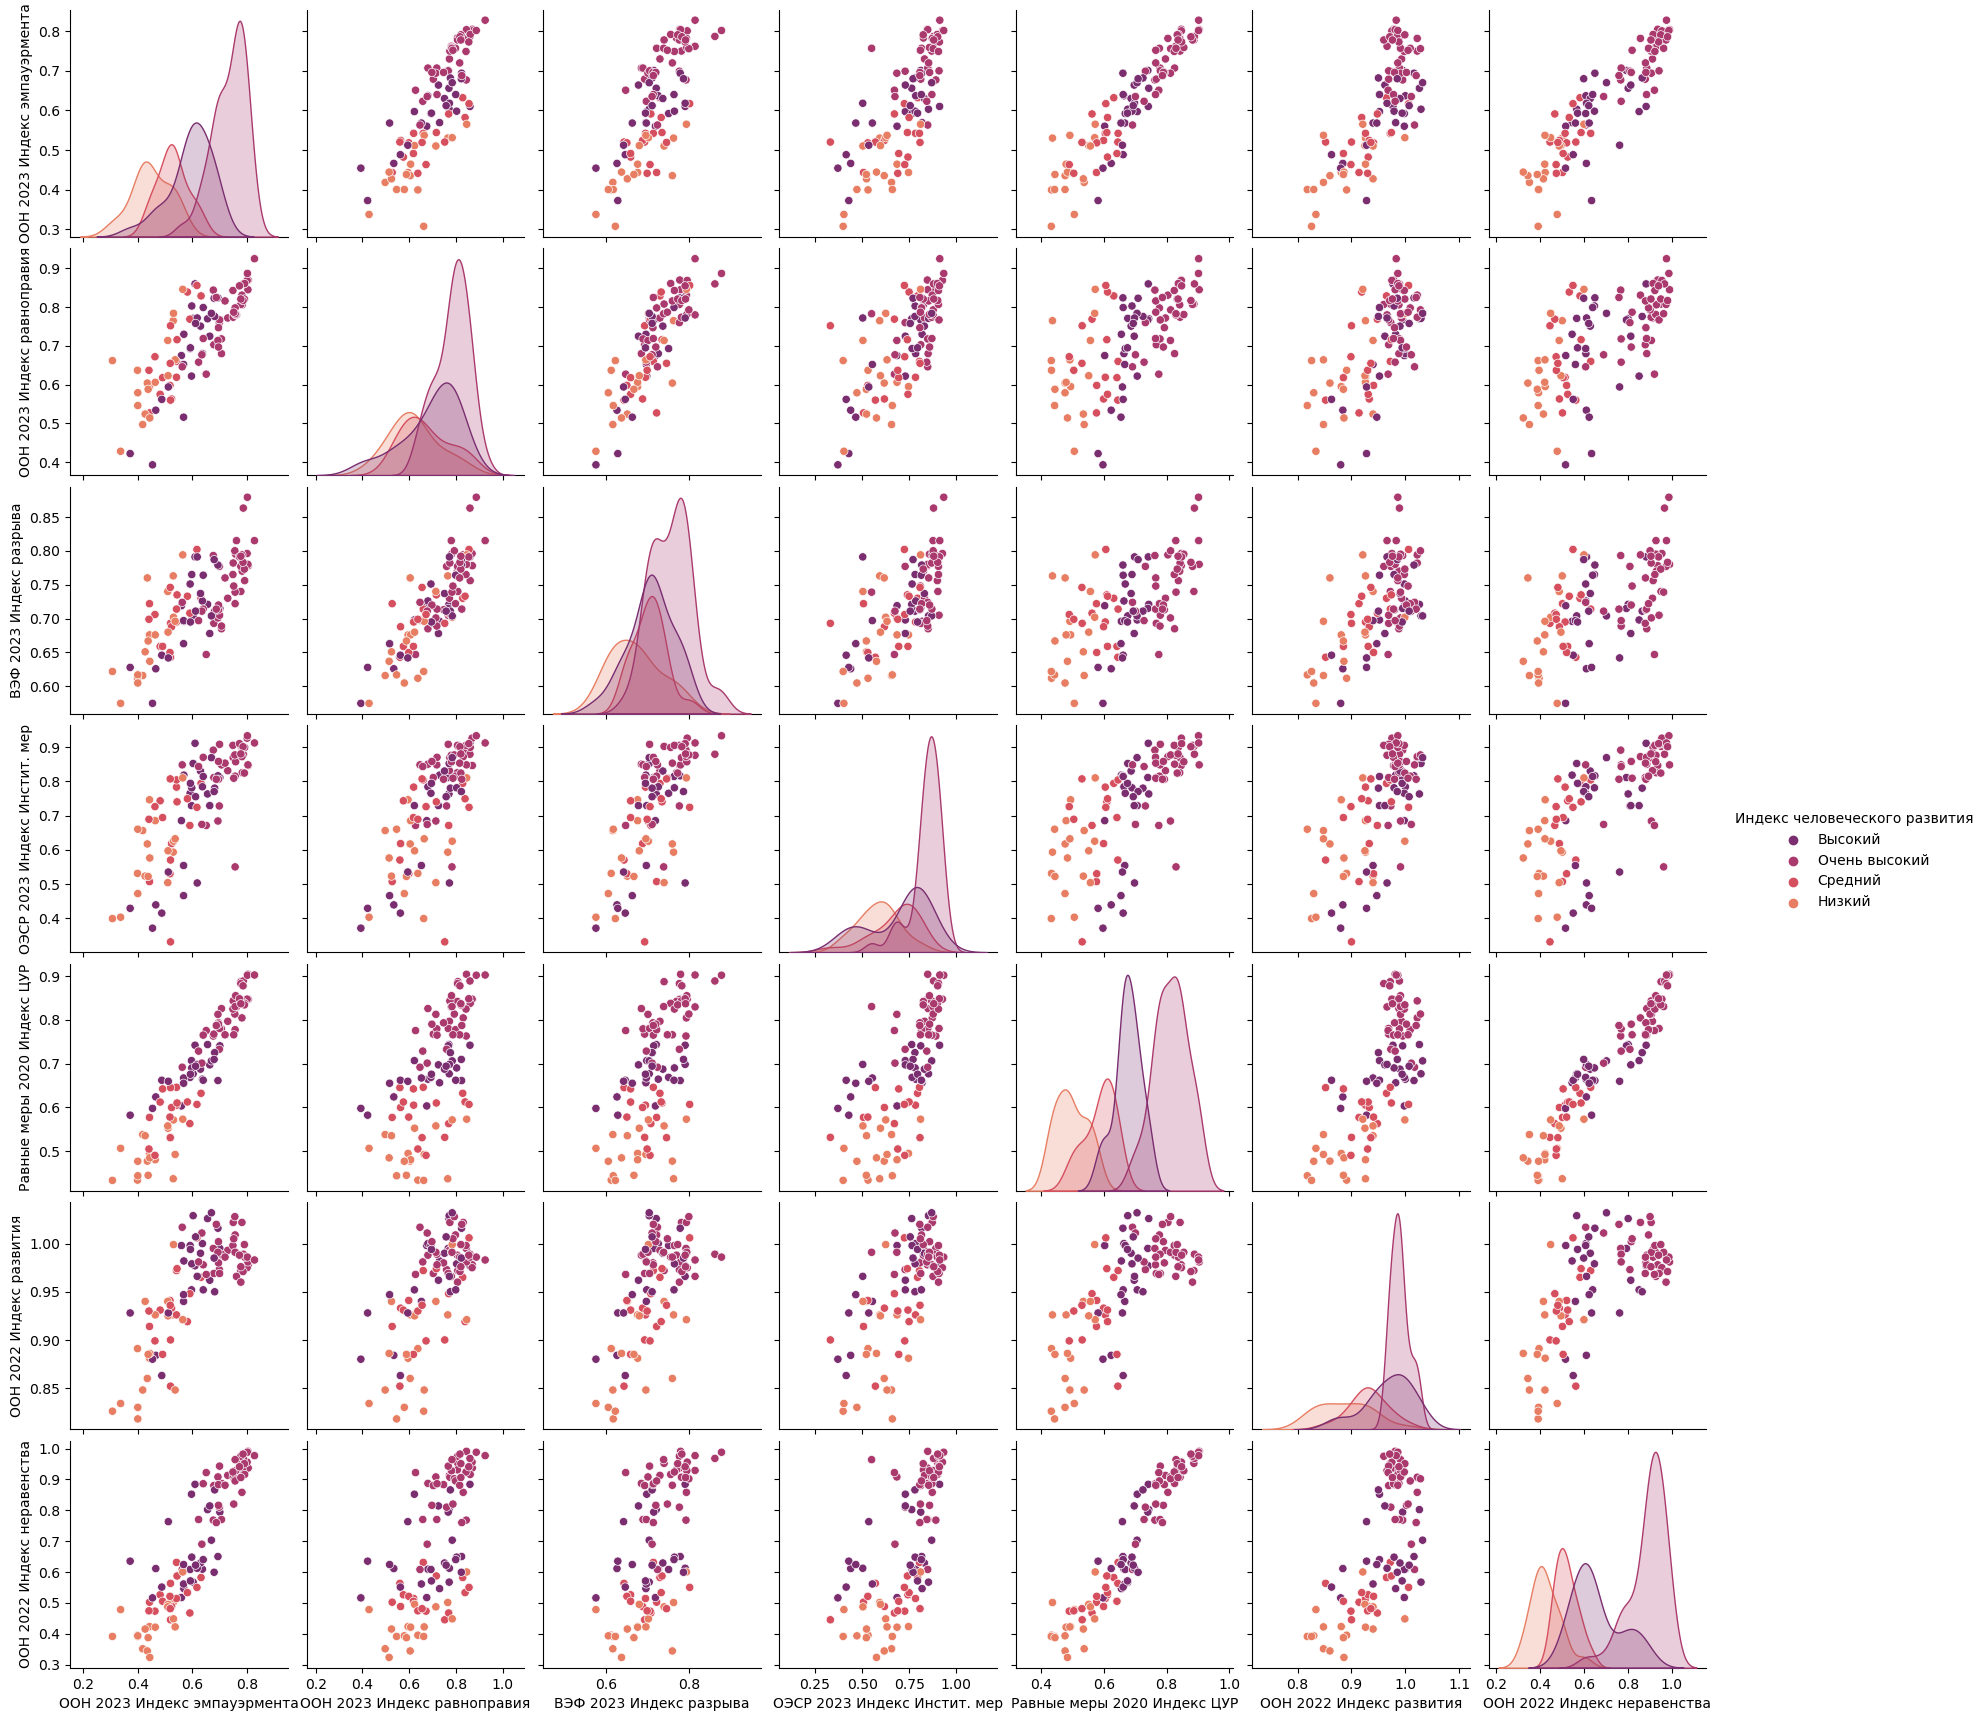

In [12]:
sns.pairplot(df, palette='flare_r', hue = 'Индекс человеческого развития');

/var/folders/40/4tj44zl90rv_7zclngp8l_j00000gn/T/ipykernel_26563/3897674914.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
/var/folders/40/4tj44zl90rv_7zclngp8l_j00000gn/T/ipykernel_26563/3897674914.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method = 'spearman'), square=False, cmap=v, mask=mask, annot=True);


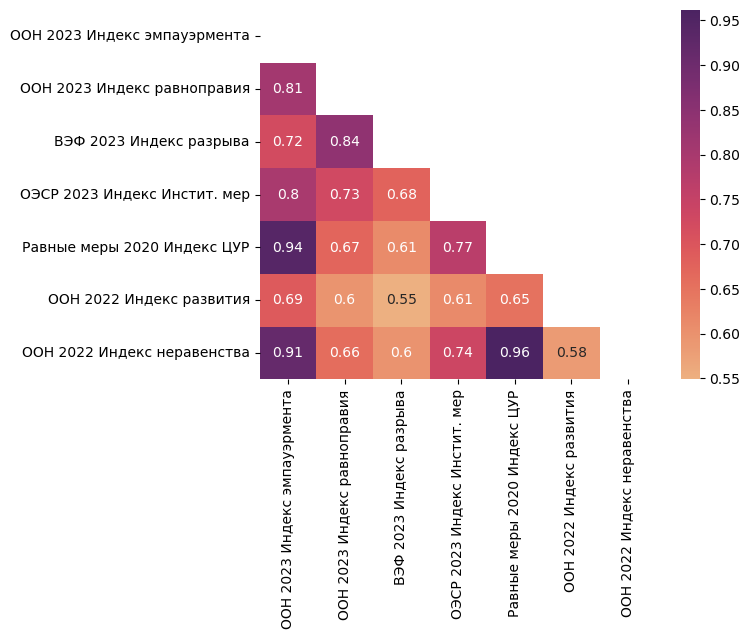

In [13]:
corr = df.corr()
v = sns.color_palette("flare", as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
# cmap = sns.diverging_palette(200, 20, as_cmap=True)
sns.heatmap(df.corr(method = 'spearman'), square=False, cmap=v, mask=mask, annot=True);